# 4. Script for statistical analysis of sentiment analysis results

## Set Up

In [1]:
import pandas as pd

In [38]:
pd.set_option('display.max_colwidth', None)

In [2]:
path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

# Import score data
reddit = pd.read_csv(path+'comments_reddit_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
fb = pd.read_csv(path+'comments_fb_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)

In [3]:
display(reddit.head())
display(fb.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000
1,gww5jfz,&gt; This means people will no longer be allow...,> This means people will no longer be allowed ...,> This means people will no longer be allowed ...,-0.2462,0.208333
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah shag,phase 2 lai liao wah tired,-0.4404,-0.400000
3,gww6icr,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,-0.9668,-0.244444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,0.0772,-0.100000


,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,10157877630867115,The opening up in early April was way too much...,The opening up in early April was way too much...,The opening up in early April was way too much...,0.0000,0.000000
1,10157877561317115,"Please ban India flights, India citizens India...","Please ban India flights, India citizens India...","Please ban India flights, India citizens India...",-0.7044,0.047917
2,10157877564117115,Haiz.. no apologies for importing cases. All y...,Haiz.. no apologies for importing cases. All y...,Sigh.. no apologies for importing cases. All y...,0.3382,0.468750
3,10157877557412115,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...,-0.8805,-0.125000
4,10157877555032115,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...,-0.8319,0.250000


## Difference in means test

In [4]:
# Get comment population size
print('Reddit population size: {}'.format(len(reddit)))
print('FB population size: {}'.format(len(fb)))

Reddit population size: 9112
FB population size: 6607


To determine if there is a statistically-significant difference between Reddit and Facebook polarity scores, I will conduct a difference in means test of the two different Reddit/FB comment samples. It is possible to conduct such a test with unequal sample sizes, but it is nonetheless more efficient to have an equal sample size in both groups to increase the power of the test. Hence, I will take a random sample of **5000 comments** for each platform.

I will also test for normality of the samples to determine what type of two-sample tests (parametric/non-parametric) to use.

Here we assume that Reddit and Facebook comments are both independent as the comments are obtained from different platforms.

In [5]:
# Obtain random sample of Reddit comments
import random
import numpy as np
random.seed(21)

reddit_sample_ids = random.sample(list(reddit['comment_id']), 5000)
reddit_sample = reddit[reddit.comment_id.isin(reddit_sample_ids)]

display(reddit_sample.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
1,gww5jfz,&gt; This means people will no longer be allow...,> This means people will no longer be allowed ...,> This means people will no longer be allowed ...,-0.2462,0.208333
3,gww6icr,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,-0.9668,-0.244444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,0.0772,-0.100000
5,gww6q6n,Got wfh leh,Got wfh leh,Got Work From Home leh,0.0000,0.000000
7,gww6rut,"They can make rules, but I really wonder how m...","They can make rules, but I really wonder how m...","They can make rules, but I really wonder how m...",-0.3612,0.400000


In [6]:
# Obtain random sample of Facebook comments
import random
import numpy as np
random.seed(42)

fb_sample_ids = random.sample(list(fb['comment_id']), 5000)
fb_sample = fb[fb.comment_id.isin(fb_sample_ids)]

display(fb_sample.head())

,comment_id,text,text_clean_sa,text_replaced,score_vader,score_tb
0,10157877630867115,The opening up in early April was way too much...,The opening up in early April was way too much...,The opening up in early April was way too much...,0.0000,0.00000
2,10157877564117115,Haiz.. no apologies for importing cases. All y...,Haiz.. no apologies for importing cases. All y...,Sigh.. no apologies for importing cases. All y...,0.3382,0.46875
3,10157877557412115,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...,-0.8805,-0.12500
4,10157877555032115,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...,-0.8319,0.25000
5,10157877610822115,Better to be safe than sorry. Stay safe. We ca...,Better to be safe than sorry. Stay safe. We ca...,Better to be safe than sorry. Stay safe. We ca...,0.8126,0.25000


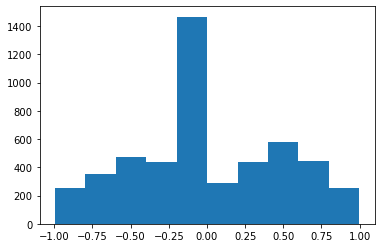

In [7]:
# View distribution of Reddit VADER sample
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(reddit_sample['score_vader'])
plt.show()

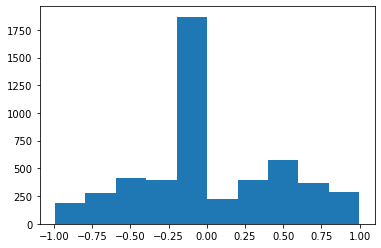

In [8]:
# View distribution of FB VADER sample
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(fb_sample['score_vader'])
plt.show()

In [9]:
# Check normality of samples using Shapiro-Wilk test
import scipy.stats as stats

reddit_stat, reddit_p = stats.shapiro(reddit_sample['score_vader'])
fb_stat, fb_p = stats.shapiro(fb_sample['score_vader'])

print('Reddit stat: {:.4f}'.format(reddit_stat),'Reddit p-value: {:.4f}'.format(reddit_p))
print('FB stat: {:.4f}'.format(fb_stat),'FB p-value: {:.4f}'.format(fb_p))

Reddit stat: 0.9710 Reddit p-value: 0.0000
FB stat: 0.9595 FB p-value: 0.0000


Based on the Shapiro-Wilk test, since p-value < 0.05, we fail to reject the null that the samples are non-normally distributed. Hence, we will have to use non-parametric tests like the Mann-Whitney test instead of parametric tests like the Welch t-test.

### VADER scores

In [10]:
# Conduct Mann-Whitney U two-sided test
stat, p = stats.mannwhitneyu(reddit_sample['score_vader'], fb_sample['score_vader'], alternative='two-sided')
print('Statistic: {:.4f}'.format(stat), 'p-value: {:.4f}'.format(p))

Statistic: 12191610.0000 p-value: 0.0305


In [11]:
# Conduct Mann-Whitney U one-sided test (Reddit more negative than FB)
stat, p = stats.mannwhitneyu(reddit_sample['score_vader'], fb_sample['score_vader'], alternative='less')
print('Statistic: {:.4f}'.format(stat), 'p-value: {:.4f}'.format(p))

Statistic: 12191610.0000 p-value: 0.0152


In [12]:
# Conduct Mann-Whitney U one-sided test (Reddit more positive than FB)
stat, p = stats.mannwhitneyu(reddit_sample['score_vader'], fb_sample['score_vader'], alternative='greater')
print('Statistic: {:.4f}'.format(stat), 'p-value: {:.4f}'.format(p))

Statistic: 12191610.0000 p-value: 0.9848


### TextBlob scores

In [13]:
# Conduct Mann-Whitney U two-sided test
stat, p = stats.mannwhitneyu(reddit_sample['score_tb'], fb_sample['score_tb'], alternative='two-sided')
print('Statistic: {:.4f}'.format(stat), 'p-value: {:.4f}'.format(p))

Statistic: 12307429.0000 p-value: 0.1701


In [14]:
# Conduct Mann-Whitney U one-sided test (Reddit more negative than FB)
stat, p = stats.mannwhitneyu(reddit_sample['score_tb'], fb_sample['score_tb'], alternative='less')
print('Statistic: {:.4f}'.format(stat), 'p-value: {:.4f}'.format(p))

Statistic: 12307429.0000 p-value: 0.0851


In [15]:
# Conduct Mann-Whitney U one-sided test (Reddit more positive than FB)
stat, p = stats.mannwhitneyu(reddit_sample['score_tb'], fb_sample['score_tb'], alternative='greater')
print('Statistic: {:.4f}'.format(stat), 'p-value: {:.4f}'.format(p))

Statistic: 12307429.0000 p-value: 0.9149


According to the results of the Mann-Whitney U tests (both two-sided and one-sided), based on both VADER and TextBlob scoring, we **fail to reject the null that there is no polarity difference** between Reddit and Facebook comments. 

## Temporal analysis

### Obtain datetime data for comments

In [16]:
# Import score data
path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

reddit_score = pd.read_csv(path+'comments_reddit_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
fb_score = pd.read_csv(path+'comments_fb_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)

reddit_score = reddit_score[['comment_id', 'text_replaced', 'score_vader', 'score_tb']]
fb_score = fb_score[['comment_id', 'text_replaced', 'score_vader', 'score_tb']]

In [17]:
# Inspect score data
display(reddit_score.head())
display(fb_score.head())

,comment_id,text_replaced,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NO,-0.2960,0.000000
1,gww5jfz,> This means people will no longer be allowed ...,-0.2462,0.208333
2,gww68ne,phase 2 lai liao wah tired,-0.4404,-0.400000
3,gww6icr,Government fucks up and takes it out on the po...,-0.9668,-0.244444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,0.0772,-0.100000


,comment_id,text_replaced,score_vader,score_tb
0,10157877630867115,The opening up in early April was way too much...,0.0000,0.000000
1,10157877561317115,"Please ban India flights, India citizens India...",-0.7044,0.047917
2,10157877564117115,Sigh.. no apologies for importing cases. All y...,0.3382,0.468750
3,10157877557412115,Tighten local measures but fail to shut border...,-0.8805,-0.125000
4,10157877555032115,Blaming us for not following safe distancing m...,-0.8319,0.250000


In [18]:
# Import Reddit post data
reddit_comment_ids = pd.read_csv(path+'comments_reddit_ids.csv', index_col=0, dtype={'post_id': 'str', 'comment_id': 'str'})
reddit_post_data = pd.read_csv(path+'posts_reddit_fb_selected.csv', dtype={'id':'str'})
reddit_post_data = reddit_post_data[['id', 'created_sgt']]

display(reddit_comment_ids.head())
display(reddit_post_data.head())

,post_id,comment_id
0,n4li0v,gww5drd
1,n4li0v,gww5jfz
2,n4li0v,gww68ne
3,n4li0v,gww6icr
4,n4li0v,gww6luf


,id,created_sgt
0,n4li0v,4/5/2021 18:59
1,n4li5g,4/5/2021 18:59
2,n52529,5/5/2021 8:00
3,n61hcv,6/5/2021 15:09
4,nc0vau,14/5/2021 13:06


In [19]:
# Join Reddit post data to score data to obtain score data with datetime info
reddit_comment_data = reddit_comment_ids.merge(reddit_score, how='inner', on='comment_id')
reddit_comment_data = reddit_comment_data.merge(reddit_post_data, how='inner', left_on='post_id', right_on='id').drop(['post_id', 'id'], axis=1)
reddit_comment_data.head()

,comment_id,text_replaced,score_vader,score_tb,created_sgt
0,gww5drd,ALL MY PLANS ARE GONE NO,-0.2960,0.000000,4/5/2021 18:59
1,gww5jfz,> This means people will no longer be allowed ...,-0.2462,0.208333,4/5/2021 18:59
2,gww68ne,phase 2 lai liao wah tired,-0.4404,-0.400000,4/5/2021 18:59
3,gww6icr,Government fucks up and takes it out on the po...,-0.9668,-0.244444,4/5/2021 18:59
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,0.0772,-0.100000,4/5/2021 18:59


In [20]:
# Define function to extract date from created_sgt column and apply it to the dataframe
def get_date(date_str):
    import datetime
    date = datetime.datetime.strptime(date_str, "%d/%m/%Y %H:%M").date()
    return(date)

reddit_comment_data['date'] = reddit_comment_data.created_sgt.apply(get_date)
reddit_comment_data = reddit_comment_data.drop('created_sgt', axis=1)
reddit_comment_data.head()

,comment_id,text_replaced,score_vader,score_tb,date
0,gww5drd,ALL MY PLANS ARE GONE NO,-0.2960,0.000000,2021-05-04
1,gww5jfz,> This means people will no longer be allowed ...,-0.2462,0.208333,2021-05-04
2,gww68ne,phase 2 lai liao wah tired,-0.4404,-0.400000,2021-05-04
3,gww6icr,Government fucks up and takes it out on the po...,-0.9668,-0.244444,2021-05-04
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,0.0772,-0.100000,2021-05-04


In [21]:
# Import Facebook comment data
fb_comment_data = pd.read_csv(path+'comments_fb_all.csv', index_col=0, dtype={'comment_id': 'str', 'text_id': 'str'})
fb_comment_data = fb_comment_data[['comment_id', 'post_time']]
fb_comment_data.head()

,comment_id,post_time
0,10157877630867115,2021-05-04 06:59:47
1,10157877561317115,2021-05-04 06:59:47
2,10157877564117115,2021-05-04 06:59:47
3,10157877557412115,2021-05-04 06:59:47
4,10157877555032115,2021-05-04 06:59:47


In [22]:
# Join Facebook comment data to score data to obtain score data with datetime info
fb_comment_data = fb_score.merge(fb_comment_data, how='inner', on='comment_id')
fb_comment_data.head()

,comment_id,text_replaced,score_vader,score_tb,post_time
0,10157877630867115,The opening up in early April was way too much...,0.0000,0.000000,2021-05-04 06:59:47
1,10157877561317115,"Please ban India flights, India citizens India...",-0.7044,0.047917,2021-05-04 06:59:47
2,10157877564117115,Sigh.. no apologies for importing cases. All y...,0.3382,0.468750,2021-05-04 06:59:47
3,10157877557412115,Tighten local measures but fail to shut border...,-0.8805,-0.125000,2021-05-04 06:59:47
4,10157877555032115,Blaming us for not following safe distancing m...,-0.8319,0.250000,2021-05-04 06:59:47


In [23]:
# Define function to extract date from post_time column and apply it to the dataframe
def get_date(date_str):
    import datetime
    date = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S").date()
    return(date)

fb_comment_data['date'] = fb_comment_data.post_time.apply(get_date)
fb_comment_data = fb_comment_data.drop('post_time', axis=1)
fb_comment_data.head()

,comment_id,text_replaced,score_vader,score_tb,date
0,10157877630867115,The opening up in early April was way too much...,0.0000,0.000000,2021-05-04
1,10157877561317115,"Please ban India flights, India citizens India...",-0.7044,0.047917,2021-05-04
2,10157877564117115,Sigh.. no apologies for importing cases. All y...,0.3382,0.468750,2021-05-04
3,10157877557412115,Tighten local measures but fail to shut border...,-0.8805,-0.125000,2021-05-04
4,10157877555032115,Blaming us for not following safe distancing m...,-0.8319,0.250000,2021-05-04


### Plot changes in score over time

In [24]:
# Get mean scores grouped by date
reddit_vader_plot = reddit_comment_data[['score_vader', 'date']].groupby('date').mean()
fb_vader_plot = fb_comment_data[['score_vader', 'date']].groupby('date').mean()
reddit_tb_plot = reddit_comment_data[['score_tb', 'date']].groupby('date').mean()
fb_tb_plot = fb_comment_data[['score_tb', 'date']].groupby('date').mean()

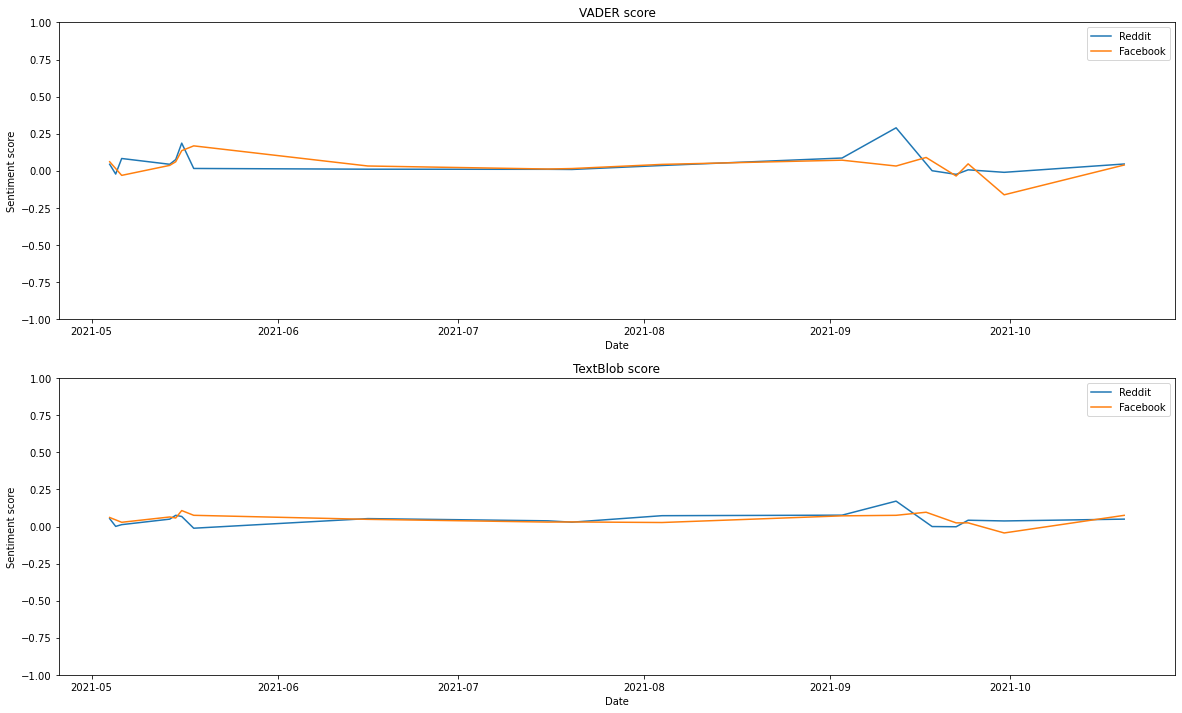

In [25]:
# Plot scores over time
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(211)
ax1.plot(reddit_vader_plot, label='Reddit')
ax1.plot(fb_vader_plot, label='Facebook')
ax1.set(title='VADER score', xlabel='Date', ylabel='Sentiment score', ylim=[-1,1])
plt.legend()

ax2 = fig.add_subplot(212)
ax2.plot(reddit_tb_plot, label='Reddit')
ax2.plot(fb_tb_plot, label='Facebook')
ax2.set(title='TextBlob score', xlabel='Date', ylabel='Sentiment score', ylim=[-1,1])
plt.legend()

plt.show()

Plotting the change in sentiment scores over time gives better insight into why there is no statistically significant difference between the mean polarity score of Facebook and Reddit comments. For both VADER and TextBlob scoring, we see that while Reddit comments are more negative than Facebook comments initially sometime in May-June 2021, Reddit comments are substantially more positive than Facebook comments in Sep-Oct 2021. To understand these patterns, I will look closer at the articles and the corresponding comments in May 2021 at 3 points when the gap in scores across platform was biggest:

1. Mid May 2021 when Facebook comments were most positive
2. Sep 2021 when Reddit comments were most positive 
3. Sep/Oct 2021 when Facebook comments were most negative 

### Closer inspection of comments from certain dates

In [26]:
# Get date when FB comments were most positive
display(fb_vader_plot.sort_values(by='score_vader', ascending=False)[0:1])

,score_vader
date,
2021-05-18,0.167737


In [39]:
# Inspect Facebook comments from 2021-05-18
import datetime
fb_comment_data[fb_comment_data['date'] == datetime.datetime(2021,5,18).date()]

,comment_id,text_replaced,score_vader,score_tb,date
2789,10158304656502934,"Honestly, preschools should be closed as well. Childcare and studentcare to be open for parents who can’t Work From Home. These young ones are told that they can’t sing songs and play together with others... have you interacted with kids below 6yo? 🤦🏻‍♀️ Most childcare centres are pretty small. When they eat or during routine time, their masks are off and they’d definitely talk to each other. Many preschoolers have older siblings in primary or secondary school. I’m very worried that there’d be an outbreak in preschools coz can you imagine what these kiddos will be going through? Please don’t wait until the bomb go jibaboom le then react. Like what these politicians have been doing. The older kids are suffering because of these politicians man 😢",0.9164,0.140556,2021-05-18
2790,10158304806757934,This dribs-and-drabs strategy is so confusing that even SPH Money FM gave the wrong covid-19 restrictions earlier this afternoon. Someone must explain to the higher-ups aka Ministers the meaning of death by a thousand cuts.,-0.8932,-0.266667,2021-05-18
2791,10158304706362934,All adults courses that are conducted in groups should be suspended as well. Stay safe,0.2263,0.500000,2021-05-18
2792,10158305563272934,Perhaps extra tuition can be phased out permanently as well and people can actually live now.... I think only Singapore puts so much emphasis on tuition...,0.2732,0.084091,2021-05-18
2793,10158305311122934,"Please make it mandatory for lifelong learning institutes to convert all classes to online classes too.. Apparently classes are still being conducted physically with multiple learners still coming in and out of the centres to attend their lessons in groups of more than 2 people. Though this round of viruses may be more prone towards children, that does not mean it does not affect the adults too. We should minimise all these risks now to prevent further clusters from happening. Singapore Ministry of Manpower Ministry of Health, Singapore",0.1531,0.100694,2021-05-18
2794,10158304653407934,Remember some time back we wanted to find ways to not have parents not push kids to tuition and lessen pressures on our kids. Turns out the solution was a pandemic.,0.0000,0.000000,2021-05-18
2795,10158304646142934,"If feasible, turn off all airconditioning and open windows of rooms to minimise chances of transmission.",0.2023,0.000000,2021-05-18
2796,10158304917352934,Don’t complain. 61% voted for People's Action Party. So this is the consequences.,0.0516,0.100000,2021-05-18
2797,10158304811027934,Just wondering whether there will be lesser topics tested for major exams.,0.0000,0.031250,2021-05-18
2798,10158306385772934,I would say piano one on ones especially for the super young kids should still remain open physically especially this age group like 4 to 7 is too young to do zooming.,0.7693,0.088889,2021-05-18


In [28]:
# Get date when Reddit comments were most positive
display(reddit_vader_plot.sort_values(by='score_vader', ascending=False)[0:1])

,score_vader
date,
2021-09-12,0.289533


In [40]:
# Inspect Reddit comments from 2021-09-12
reddit_comment_data[reddit_comment_data['date'] == datetime.datetime(2021,9,12).date()]

,comment_id,text_replaced,score_vader,score_tb,date
6606,hcjh1d8,"> This temporary suspension of visitation will give us time to encourage more unvaccinated seniors to get vaccinated, and roll out the vaccine booster programme for residents of aged care facilities,” All there we go",0.7579,0.200000,2021-09-12
6607,hcjhrsy,"As someone who works in a nursing home, I just feel so done with all these on-off-on-off restrictions. Sigh and again with the buying time for unvaccinated seniors to get vaccinated.... I have no words",-0.2732,0.000000,2021-09-12
6608,hcjim3f,Would a vaccine mandate help? What would you wish the government did as someone deep in the weeds?,0.6966,0.000000,2021-09-12
6609,hcjjuzj,My nursing home has already achieved 90% vaccinated status.. the remaining 10% are mostly anti-vaccinated Not sure how much a vaccine mandate might help since these anti-vaccinated would rage about whether the government will take responsibility if they get side effects from the vaccine We've been encouraging them to get vaccinated for like a year... Feel more like a pushy salesman than a healthcare worker at this point,0.5373,0.237500,2021-09-12
6610,hcjk694,Hmm… what about segregation?,0.0000,0.000000,2021-09-12
6611,hcjklod,Again uselessly pursuing the vaccination rates. Those that can and want to get vaccinated have already done their first shot by now,-0.2960,-0.125000,2021-09-12
6612,hcjlgku,Imagine being a vaccinated resident and now you can't get visitors anymore,0.0000,0.000000,2021-09-12
6613,hcjpk4f,Do you think it would be feasible to allow visits if both resident and visitor are fully vaccinated? Blanket restrictions that apply as harshly to both vaccinated and unvaccinated are making less and less sense given the direction we have chosen to tackle the pandemic.,0.2263,-0.177778,2021-09-12
6614,hcjrs9m,"Really no reason to “buy them more time”. They’re not interested. Period. If they don’t want to get vaccinated then they should pay the price. ""We're aiming for free movement... What will happen now is that the virus will circulate and it will find the ones who are not vaccinated,"" epidemiologist Lone Simonsen told AFP",0.0678,0.168750,2021-09-12
6615,hcjtstg,"The SJWs are gonna get triggered and start pulling up comparisons with apartheid, US racial segregation, even the Holocaust",0.0000,0.000000,2021-09-12


In [29]:
# Get date when FB comments were most negative
display(fb_vader_plot.sort_values(by='score_vader', ascending=True)[0:1])

,score_vader
date,
2021-09-30,-0.162419


In [42]:
# Inspect FB comments from 2021-09-30
fb_comment_data[fb_comment_data['date'] == datetime.datetime(2021,9,30).date()]

,comment_id,text_replaced,score_vader,score_tb,date
5957,10158154349842115,How about the non graduating classes? Because they may have seniors at home?,0.0000,0.000000,2021-09-30
5958,10158154323852115,Sebastian Wong,0.0000,0.000000,2021-09-30
5959,10158154338022115,"AGAIN, for the nth time, and I will continue to do so: Vaccination is not to make you IMMORTAL. Vaccination does not PREVENT infection or death. It’s to REDUCE your potential of infection/ death.",-0.7706,0.000000,2021-09-30
5960,10158154412872115,How about secondary schools? We seem to have neglected this group.,-0.5267,-0.300000,2021-09-30
5961,10158154350047115,mothership.Singapore/ 2021/09/ seniors-stay-hom e-covid-19/,0.0000,0.000000,2021-09-30
5962,10158154324762115,all unis and schools will eventually no longer exist physically within 3 years. they will all collapse and those that want to - will be stopped by their parents and future planned epidemics,-0.7184,0.000000,2021-09-30
5963,10158156046902115,"Unis are institutions which, amongst other missions, are tasked to inspire cutting-edge tech and thinking. University administrators ought to, as far as possible, switch to online learning. Why make students fill lecture rooms for lectures which can just as effectively be given virtually?",0.7650,0.143750,2021-09-30
5964,10158154331052115,Now too dangerous Must go online liao,-0.4767,-0.600000,2021-09-30
5965,10158154370602115,Epic failure because only relying on leaky vaccines. And hence….the number of hospitalised patients of 616 Fully vaccinated already outnumbered the 470 Not Fully vaccinated. So hospitals are swamped with Fully Vaccinated patients who can also land up needing O2 and hospital. Constantly spending time harping and bullying the unvaccinated these few months when they should have spent more time anticipating the explosion of cases And coming up with a game plan.,-0.7845,-0.052083,2021-09-30
5966,10158154543297115,Home-Based Learning and Work From Home should be implemented long ago,0.0000,-0.050000,2021-09-30


On closer manual inspection of the articles and comments from these dates, we find that:

**May 18 article**: 'All in-person private tuition and enrichment for students aged 18 and below to be suspended: MOE'
- Some Facebook comments from this date echoed the need to protect vulnerable groups like young children
- But a lot of them are misclassified because of undetected sarcasm and sarcastic use of laughing emojis (which are indeed hard to classify because they take on different polarities in different contexts)

**Sep 12 article**: 'MOH suspends in-person visits to residential care homes from Monday as COVID-19 cases rise among residents, employees'
- Redditors were rather supportive overall of hospital care home measures as an exception to the move towards endemic living with COVID, because of the need to protect the vulnerable.    

**Sep 30 article**: 'S'pore unis move classes online to reduce spread of Covid-19 as cases continue to rise'
- Some FB comments lamented the loss of uni life
- Some complained not enough done (secondary schools needed to move online too but had not)
- Many comments also lamented continued extension of restrictions despite rising vaccination rates